In [1055]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [1057]:
df = pd.read_csv(r'C:\Users\ML\Desktop\122B1F052\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1059]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [1060]:
data=df

In [1061]:
df = data.drop(['Name', 'Ticket','PassengerId'], axis=1)

In [1064]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S


In [1065]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S


In [1066]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S


In [1068]:
df['Family']=df['SibSp']+df['Parch']

In [1069]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,3,male,34.5,0,0,7.8292,NaN,Q,0
1,1,3,female,47.0,1,0,7.0000,NaN,S,1
2,0,2,male,62.0,0,0,9.6875,NaN,Q,0
3,0,3,male,27.0,0,0,8.6625,NaN,S,0
4,1,3,female,22.0,1,1,12.2875,NaN,S,2


In [1073]:
data=df
df = data.drop(['SibSp', 'Parch'], axis=1)

In [1075]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,34.5,7.8292,NaN,Q,0
1,1,3,female,47.0,7.0000,NaN,S,1
2,0,2,male,62.0,9.6875,NaN,Q,0
3,0,3,male,27.0,8.6625,NaN,S,0
4,1,3,female,22.0,12.2875,NaN,S,2


In [1077]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   Fare      417 non-null    float64
 5   Cabin     91 non-null     object 
 6   Embarked  418 non-null    object 
 7   Family    418 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


<Axes: xlabel='Survived', ylabel='Age'>

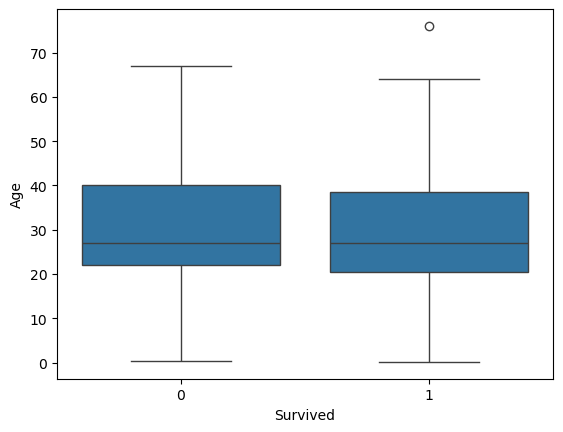

In [1078]:
sns.boxplot(data=df, x='Survived', y='Age')

<Axes: xlabel='Survived', ylabel='Age'>

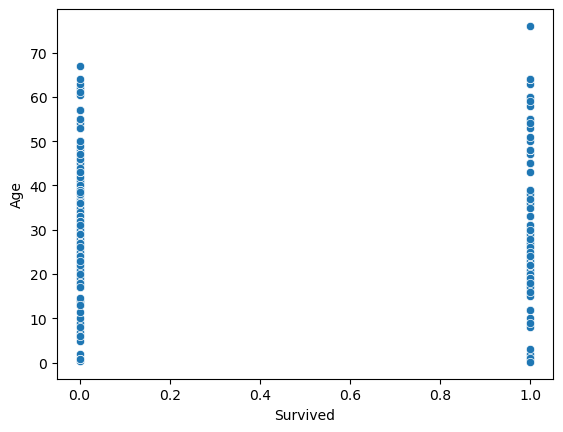

In [1079]:
sns.scatterplot(data=df, x='Survived', y='Age')

In [1081]:
df['Age'].mean()

30.272590361445783

In [1082]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\ML\AppData\Local\Temp\ipykernel_5584\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [1083]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   Fare      417 non-null    float64
 5   Cabin     91 non-null     object 
 6   Embarked  418 non-null    object 
 7   Family    418 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


In [1084]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

C:\Users\ML\AppData\Local\Temp\ipykernel_5584\1367476775.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].mean(), inplace=True)


In [1085]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   Fare      418 non-null    float64
 5   Cabin     91 non-null     object 
 6   Embarked  418 non-null    object 
 7   Family    418 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


In [1086]:
df['Cabin'].fillna('#', inplace=True)

C:\Users\ML\AppData\Local\Temp\ipykernel_5584\2012111373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('#', inplace=True)


In [1097]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   Fare      418 non-null    float64
 5   Cabin     418 non-null    object 
 6   Embarked  418 non-null    object 
 7   Family    418 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 26.3+ KB


In [1099]:
df['Cabin1']=[0 if x=='#' else 1 for x in df['Cabin']]

In [1101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   Fare      418 non-null    float64
 5   Cabin     418 non-null    object 
 6   Embarked  418 non-null    object 
 7   Family    418 non-null    int64  
 8   Cabin1    418 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [1103]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Cabin1
0,0,3,male,34.5,7.8292,#,Q,0,0
1,1,3,female,47.0,7.0000,#,S,1,0
2,0,2,male,62.0,9.6875,#,Q,0,0
3,0,3,male,27.0,8.6625,#,S,0,0
4,1,3,female,22.0,12.2875,#,S,2,0


In [1105]:
data=df
df = data.drop(['Cabin'], axis=1)

In [1107]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Cabin1
0,0,3,male,34.5,7.8292,Q,0,0
1,1,3,female,47.0,7.0000,S,1,0
2,0,2,male,62.0,9.6875,Q,0,0
3,0,3,male,27.0,8.6625,S,0,0
4,1,3,female,22.0,12.2875,S,2,0


In [1109]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [1111]:
df_encoded = pd.get_dummies(df, columns=['Embarked'], drop_first=False)

In [1113]:
df=df_encoded

In [1115]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Family,Cabin1,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,34.5,7.8292,0,0,False,True,False
1,1,3,female,47.0,7.0000,1,0,False,False,True
2,0,2,male,62.0,9.6875,0,0,False,True,False
3,0,3,male,27.0,8.6625,0,0,False,False,True
4,1,3,female,22.0,12.2875,2,0,False,False,True


In [1117]:
df.corr()

ValueError: could not convert string to float: 'male'

In [1119]:
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'male'

In [1121]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Family,Cabin1,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,34.5,7.8292,0,0,False,True,False
1,1,3,female,47.0,7.0000,1,0,False,False,True
2,0,2,male,62.0,9.6875,0,0,False,True,False
3,0,3,male,27.0,8.6625,0,0,False,False,True
4,1,3,female,22.0,12.2875,2,0,False,False,True


In [1123]:
# data=df
# df=data.drop(['Sex'], axis=1)
df['Sex'].map({'male':0.7, 'female':0.7}, inplace=True)

0      0.7
1      0.7
2      0.7
3      0.7
4      0.7
      ... 
413    0.7
414    0.7
415    0.7
416    0.7
417    0.7
Name: Sex, Length: 418, dtype: float64

In [1125]:
y=df['Survived']
X=df.drop(['Survived'], axis=1)

In [1127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = True)

In [1129]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'male'

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')